In [28]:
import lambdahat_helpers as lah
import time
import os
import torch
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
import argparse

In [29]:
folder = "essential_dynamics/output_data"
files_list = os.listdir(folder)
files_list.sort()
outs = []
for file in files_list:
    with open(f"{folder}/{file}", "rb") as f:
        data = pickle.load(f)
        outs += data
    break


(1146, 15)


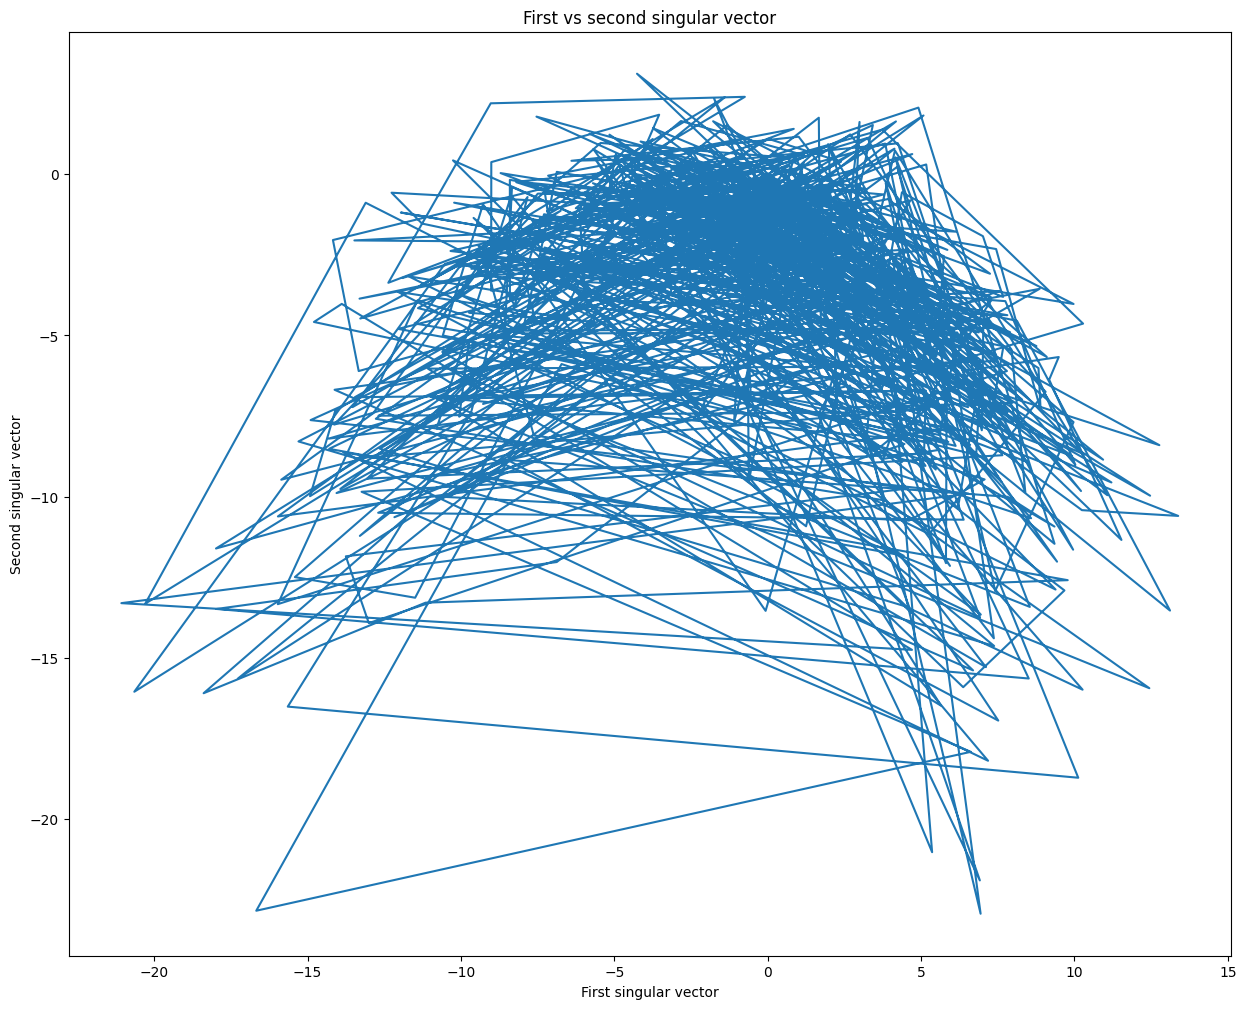

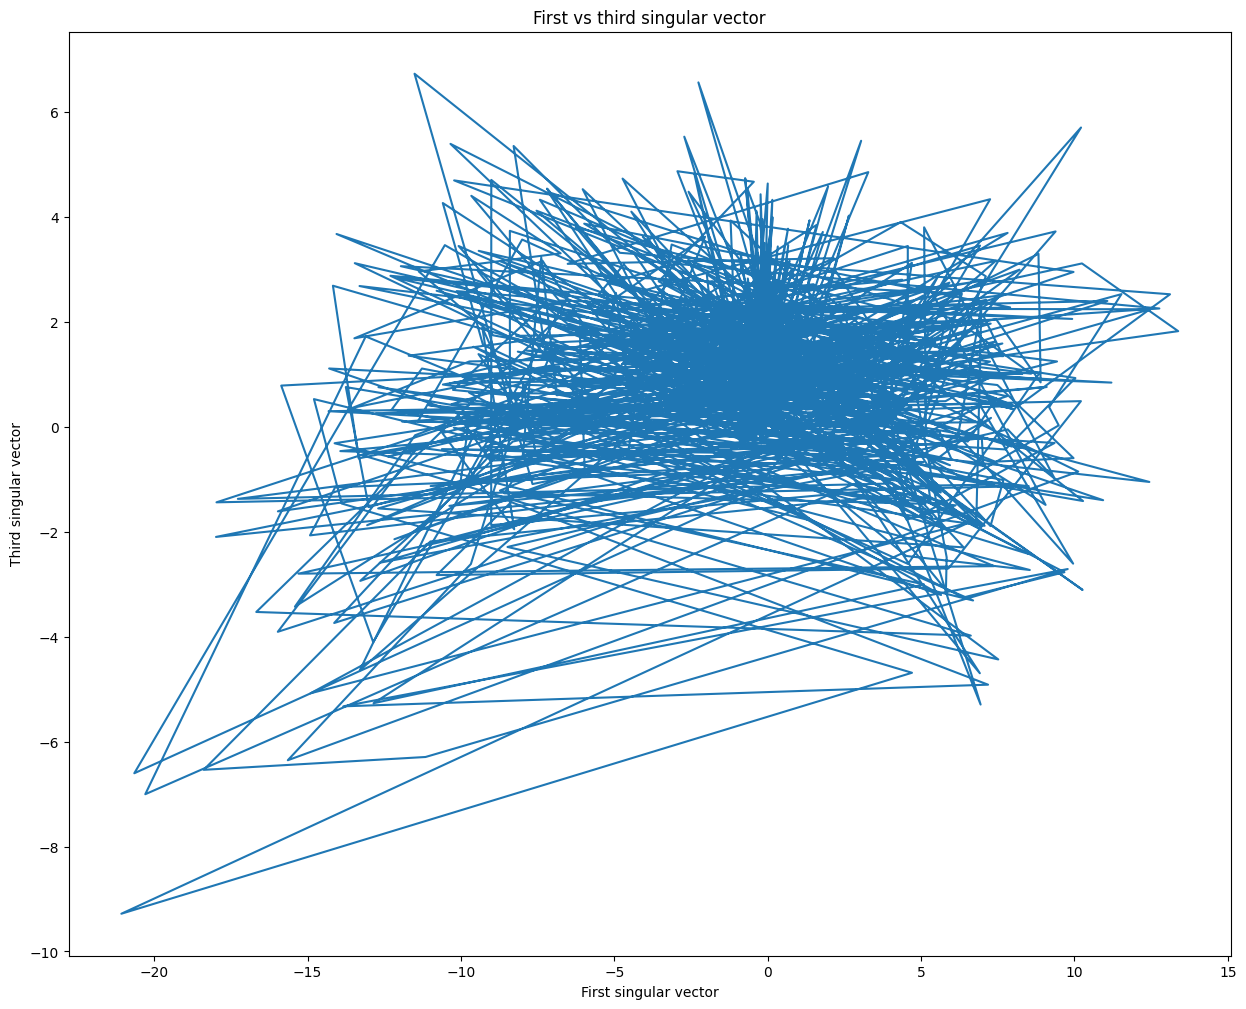

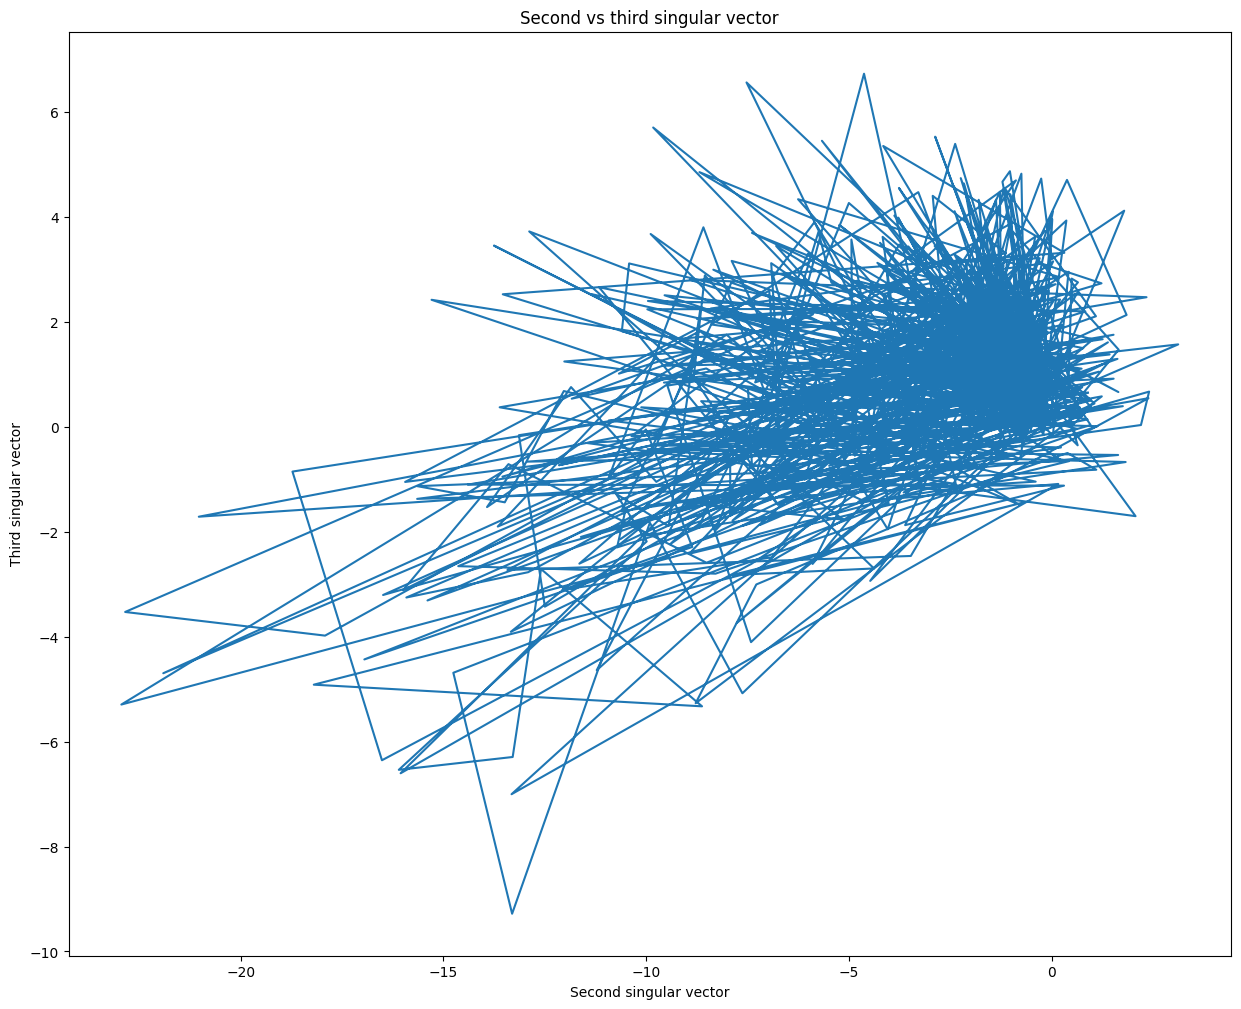

In [30]:
outs = np.array(outs)
u, s, v = np.linalg.svd(outs, full_matrices=False)

sv_over_time = u @ np.diag(s)
print(sv_over_time.shape)
os.makedirs("essential_dynamics", exist_ok=True)

# sv1 vs sv2
plt.plot(sv_over_time[:, 0], sv_over_time[:, 1], '-')
plt.xlabel("First singular vector")
plt.ylabel("Second singular vector")
plt.title("First vs second singular vector")
plt.show()
# plt.savefig("essential_dynamics/sv1_vs_sv2.png")
# plt.close()

# sv1 vs sv3
plt.plot(sv_over_time[:, 0], sv_over_time[:, 2], '-')
plt.xlabel("First singular vector")
plt.ylabel("Third singular vector")
plt.title("First vs third singular vector")
plt.show()
# plt.savefig("essential_dynamics/sv1_vs_sv3.png")
# plt.close()

# sv2 vs sv3
plt.plot(sv_over_time[:, 1], sv_over_time[:, 2], '-')
plt.xlabel("Second singular vector")
plt.ylabel("Third singular vector")
plt.title("Second vs third singular vector")
plt.show()
# plt.savefig("essential_dynamics/sv2_vs_sv3.png")
# plt.close()

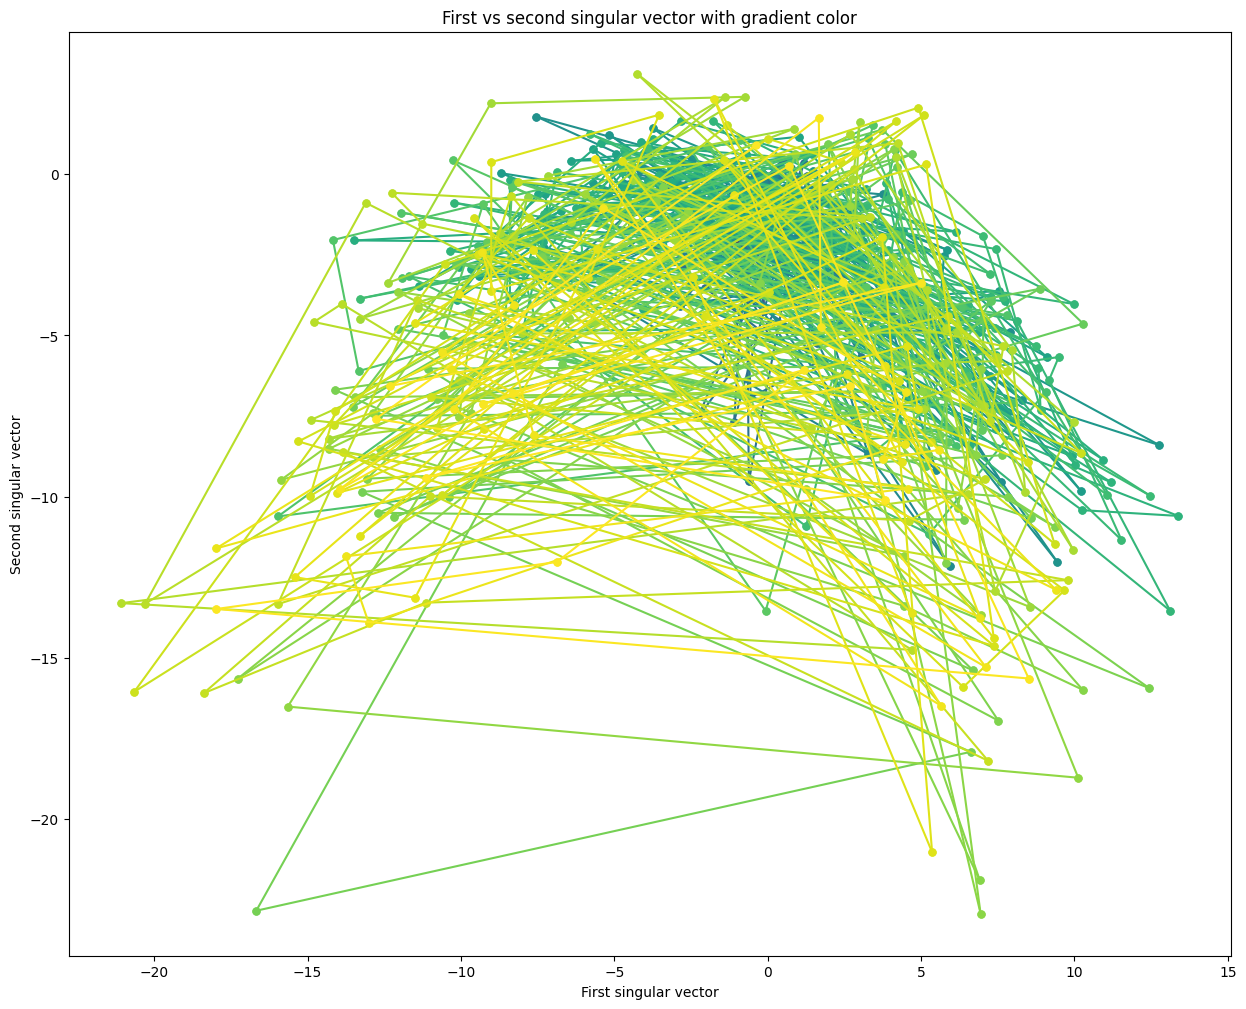

In [31]:
import matplotlib.cm as cm
# Assuming `outs` is defined and contains your data
outs = np.array(outs)
u, s, v = np.linalg.svd(outs, full_matrices=False)
sv_over_time = u @ np.diag(s)

os.makedirs("essential_dynamics", exist_ok=True)

# Number of points
n_points = sv_over_time.shape[0]

# Create a color map
colors = cm.viridis(np.linspace(0, 1, n_points))

# Plot for sv1 vs sv2 with changing colors
plt.figure()
for i in range(n_points - 1):
    plt.plot(sv_over_time[i:i+2, 0], sv_over_time[i:i+2, 1], '-o', color=colors[i], markersize=5)
plt.xlabel("First singular vector")
plt.ylabel("Second singular vector")
plt.title("First vs second singular vector with gradient color")
plt.show()
# plt.savefig("essential_dynamics/sv1_vs_sv2_gradient.png")
# plt.close()

# Plot for sv1 vs sv3 with changing colors
plt.figure()
for i in range(n_points - 1):
    plt.plot(sv_over_time[i:i+2, 0], sv_over_time[i:i+2, 2], '-o', color=colors[i], markersize=5)
plt.xlabel("First singular vector")
plt.ylabel("Third singular vector")
plt.title("First vs third singular vector with gradient color")
plt.show()
# plt.savefig("essential_dynamics/sv1_vs_sv3_gradient.png")
# plt.close()

# Plot for sv2 vs sv3 with changing colors
plt.figure()
for i in range(n_points - 1):
    plt.plot(sv_over_time[i:i+2, 1], sv_over_time[i:i+2, 2], '-o', color=colors[i], markersize=5)
plt.xlabel("Second singular vector")
plt.ylabel("Third singular vector")
plt.title("Second vs third singular vector with gradient color")
plt.show()
# plt.savefig("essential_dynamics/sv2_vs_sv3_gradient.png")
# plt.close()